In [35]:
"""First, some basic stats from chapter 5"""
from math import sqrt

def mean(x):
    '''geometric average'''
    return sum(x) / len(x)


def de_mean(x):
    '''translate x by subtracting its mean (so the result has mean 0)'''
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]


def sum_of_squares(x):
    return sum([f * f for f in x])


def variance(x):
    '''assumes x has at least two elements'''
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)


def standard_deviation(x):
    return sqrt(variance(x))


def dot(v, w):
    '''the sum of the product of the matching elements
    of the input vectors'''
    return sum(v_i * w_i for v_i,w_i in zip(v, w))


# a large covariance means that x tends to be large when y is small
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)


'''Correlation lies between -1 (perfect anti-correlation) and 1 (perfect correlation)'''
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return  0

    
"""Now we'll get into the fitting logic."""


def predict(alpha, beta, x_i):
    return beta * x_i + alpha


def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)


def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2 for x_i, y_i in zip(x, y))


def least_squares_fit(x, y):
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

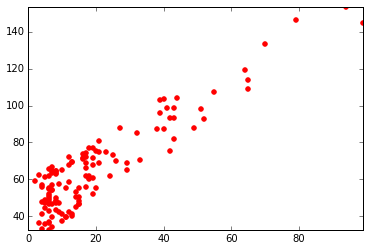

In [28]:
"""Now let's mock up some data to fit"""
%matplotlib inline
from matplotlib import pyplot as plt
from numpy.random import poisson
from random import random
from collections import Counter

# our fake data
x = list(poisson(7, 53)) + list(poisson(17, 47)) + list(poisson(42, 17)) + list(poisson(72, 7)) + [99]
y = [1.1415926535 * v + 42.0 + (-17.0 + 34.0 * random()) for v in x]

# and now let's plot it
plt.scatter(x, y, edgecolor='none', color='r')
plt.axis([0, max(x), min(y), max(y)])
plt.show()

In [30]:
alpha, beta = least_squares_fit(x, y)
print (alpha, beta)

42.7846474368 1.15449495267


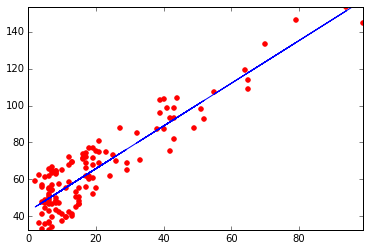

In [32]:
# and now let's the data and the fit
plt.scatter(x, y, edgecolor='none', color='r')
plt.plot(x, [beta * v + alpha for v in x], color='b')
plt.axis([0, max(x), min(y), max(y)])
plt.show()

In [38]:
def sum_of_squared_deviations(y):
    """the total variation squared of y from the mean"""
    return sum(v**2 for v in de_mean(y))


def r_squared(alpha, beta, x, y):
    """The fraction of the variation in y captured by the model,
    which equals 1 - the fraction of variation in y not captured
    by the model."""
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) /
                  sum_of_squared_deviations(y))


print(r_squared(alpha, beta, x, y))

0.83059789813
